<a href="https://colab.research.google.com/github/KevinG43/ArtificialIntelligence/blob/main/Act3_MNISTdataset_1908434.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kevin Gonzalez**

**Student ID 1908434**

**Artificial Intelligence**

**Tuesday N4**




---
# **Libraries**
First we need to import the tools we will be using for the data importation and training of the model

In [1]:
#TensorFlow & tf.keras
import tensorflow as tf
from tensorflow import keras

#Additional Libraries
import numpy as np
import matplotlib.pyplot as plt

---
# **Importing the Dataset**
For the next step, we will import the MNIST dataset, a set of 70,000 images in a low resolution 28x28 pixel format in a grayscale. These 70,000 include 60,000 training images and the other 10,000 being the testing set.

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The labels for this dataset are the numbers from 0 to 9, which will directly define the class.

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

##Exploring the dataset
The following code lines are implemented to explore and confirm that the dataset is correct, by checking the format and amount of images.

In [4]:
train_images.shape

(60000, 28, 28)

This confirms that we have 60,000 28x28 training images.

In [5]:
len(train_labels)

60000

This gives us the length of the amount of labels in the training data, which is correct; 60,000.

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We get a few examples of the labels assigned to the training data.

In [7]:
test_images.shape

(10000, 28, 28)

This is the same as the first code line, we check the amount and size of images in the testing data. 10,000 28x28 images.

In [8]:
len(test_labels)

10000

And also the amount of image labels in the testing data.

---
# **Pre-Processing**
This step is an important step before training the neural network. Why? Because we need to remove all bias that can occur due to the scales that are used. In this case, we need to transform the 0 to 255 grayscale into a 0 to 1 format.

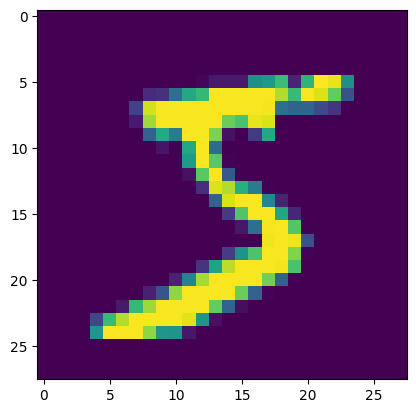

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

The way to convert this scale into an equivalent is diving by 255, using the following code lines.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To confirm that the last step was performed properly, we show the first 9 training images and their class.

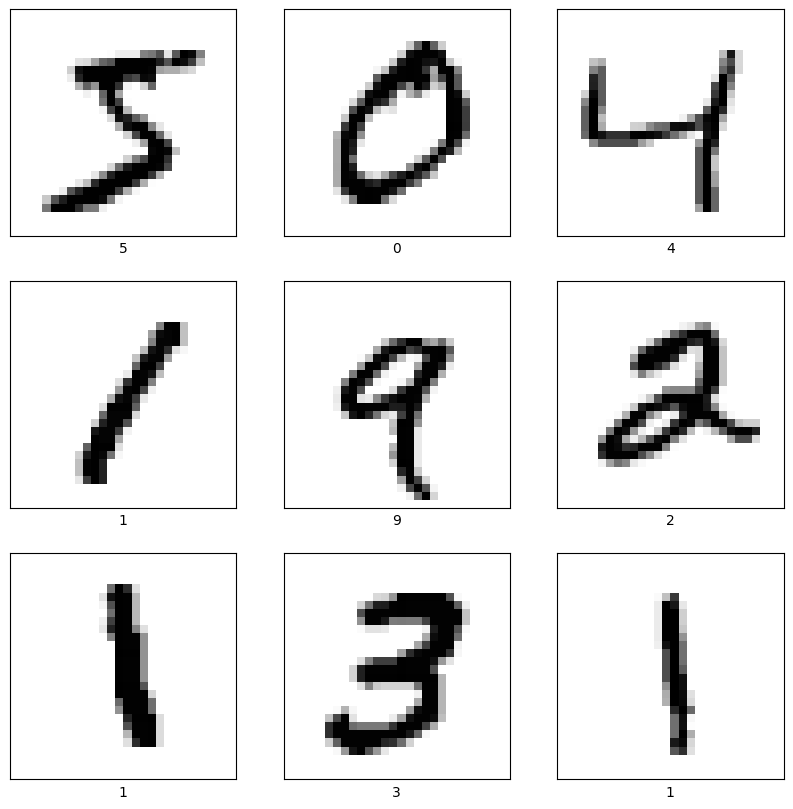

In [11]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

---
# **Building the Model**
Now that we have the data set up, now we have to build the neural network that will be trained, first setting up the layers and compiling.

##Setting Up the Layers
Firstly, we need to create a system where the images will be inserted and the output we will get. 

The first layer, flattens the image, this means turnin the 2D matrix of 28x28 pixels into a single dimension layer of 784 pixels. Basically just reorganizing the data from the image.

The second layer is dense, this meaning that the nodes are completely connected. These will process the flattened images and output the probabilities of an image falling into a class adding up to a total of 1. Each node shows the probability of the image belonging to a class.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

##Compiling the Model
Before completely training the model, some additional settings are needed, which are;

- Loss function : This function determines how far the algorithm's current output is from what is desired.
- Optimizer : Shows how the model learns and changes according to the data and the loss function.
-Metrics : Used to monitor the performance of the model, in this case, it shows the accuracy with which it classifies the images.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#**Training the Model**
The steps in training a model are the following:
- Give the training data and labels to the model 
- The model will learn to find the relation between the images and the labels
- Ask the model to make predictions based on the testing images, and verify the accuracy with the testing labels

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2632 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1163 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0790 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0461 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0222 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0179 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

##**Checking Accuracy**
Next, the testing data is used to make a measurement of the difference in accuracy.

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0771 - accuracy: 0.9775 - 694ms/epoch - 2ms/step

Test accuracy: 0.9775000214576721


The accuracy is a bit lower to the training, but it is normal, and is due to overfitting. Overfitting is when the model is introduced to new information that it did not see in the training process.

##**Making Predictions**
Now we can make the model make predictions based on testing images.


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Here a prediction is made, and is shown in a list with the class probability.

In [17]:
predictions[0]

array([2.9068277e-09, 7.4885014e-09, 9.6795027e-08, 6.5483277e-05,
       7.3010403e-15, 3.6834476e-11, 1.8660644e-15, 9.9993402e-01,
       7.9500584e-09, 3.2690764e-07], dtype=float32)

The following code line chooses the highest probability from the list and makes the prediction.

In [18]:
np.argmax(predictions[0])

7

We can confirm the prediction by checking the class of the same image.

In [19]:
test_labels[0]

7

The following code is provided to show the predictions, their probabilities and id they are correct or not.

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

For the first image, the following code show the prediction side by side with the image.

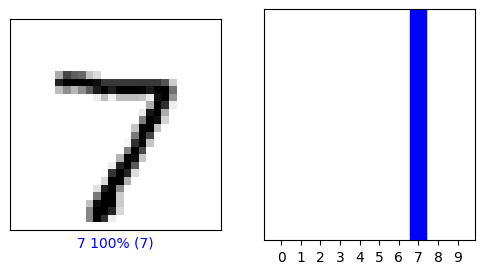

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Now we can show multiple images and the predictions made.

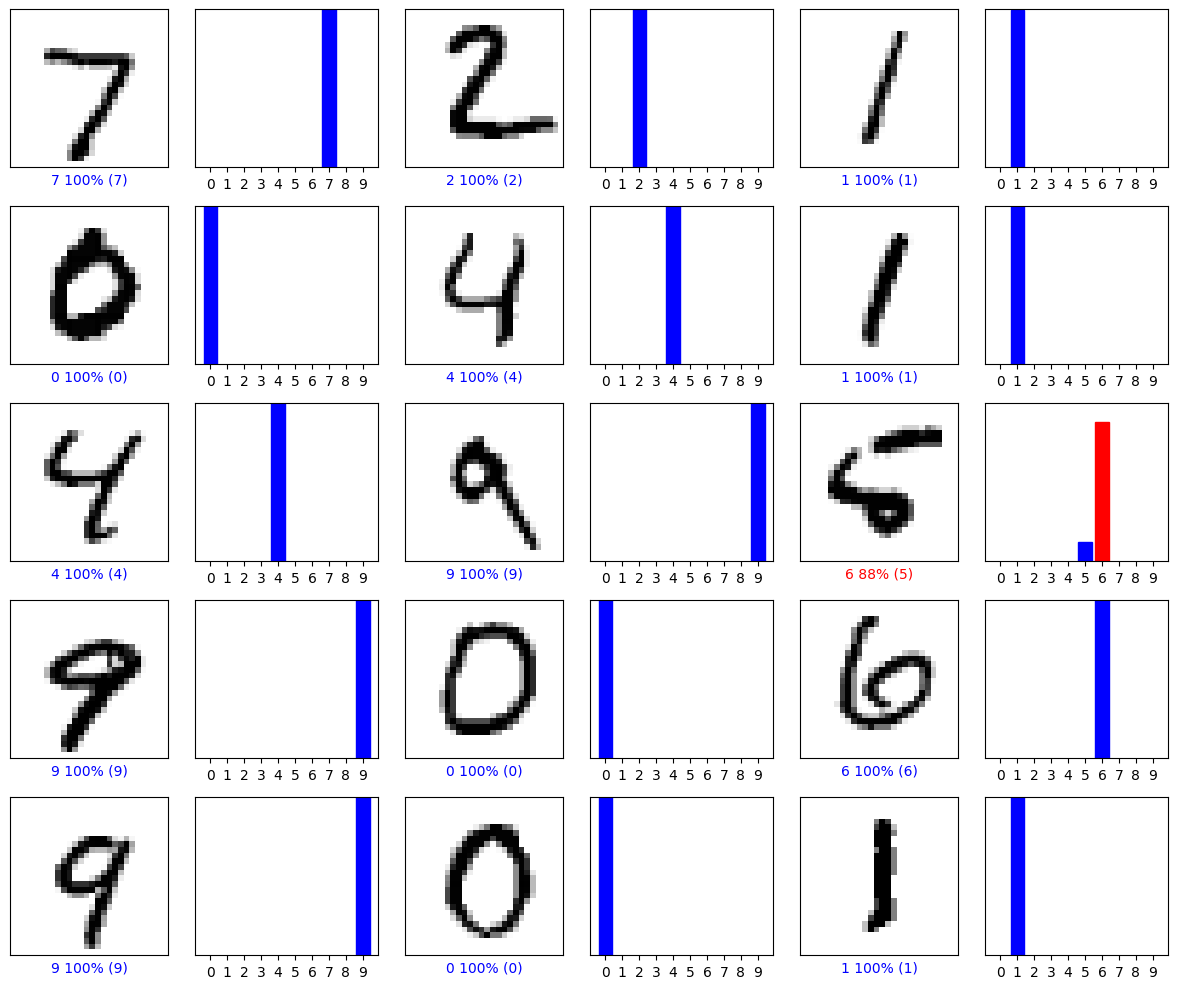

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#**Results and Conclusions**
The training part in it's last epoch had a really high accuracy, of around 99.5% this is almost assuring that almost every prediction will be correct. However, when the testing phase came, the accuracy dropped down a bit, only by 2% approximately. Which is justifiable because of the overfitting that can occur when presenting a model with new information. However it can adapt and learn from these mistakes to become even more accurate.

In the last code lines, the images were displayed with their corresponding prediction percentages. And only one of them was wrong, a 5 that looked like a 6, which personally, me as a human might have also mistaken the number. So I think the model is highly capable of making predictions of numbers. And as we know, with more data, the model becomes better.

This activity was relatively easy to perfom, due to the vast amount of information online and even in the community of tensorflow to learn and have a simple base to start off on. I find making, training and the process as a whole of making a model very intriguing, si I hope we can make more models based on more complex data.